<a href="https://colab.research.google.com/github/Shawn94/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version =1) #code to fetch MNIST dataset

In [ ]:
mnist.keys() #this is dictionary structure

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

(-0.5, 27.5, 27.5, -0.5)

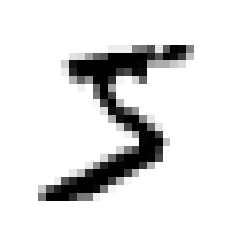

In [ ]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis('off') # clear axises

In [ ]:
y[0] #the label is a stri

'5'

In [ ]:
y = y.astype(np.uint8) #cast y to integers

In [ ]:
y[0] #check if string was cast to integer

5

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] #splitting dataset into training and test sets

In [ ]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5);

The SGDClassifier relies on randomness during training (hence
the name “stochastic”). If you want reproducible results, you
should set the random_state parameter.

In [ ]:
sgd_clf.predict([some_digit]) # some_digit = X[0] = mnist['data']

array([ True])

The classifier guesses that this image represents a 5 (True).

### Measuring Accuracy Using Cross-Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)

    print(n_correct / len(y_pred)) # Implement crossvalidation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604


### cross_val_score() function

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

The results are the same as implemented Cross-Validation code.
But accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets. 
because only about 10% of the
images are 5s, so if you always guess that an image is not a 5, you will be right about
90% of the time

# Confusion Matrix

A much better way to evaluate the performance of a classifier is to look at the confusion
matrix. The general idea is to count the number of times instances of class A are
classified as class B. For example, to know the number of times the classifier confused
images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion
matrix.

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Just like the cross_val_score() function, cross_val_predict() performs K-fold
cross-validation, but instead of returning the evaluation scores, it returns the predic‐
tions made on each test fold. This means that you get a clean prediction for each
instance in the training set (“clean” meaning that the prediction is made by a model
that never saw the data during training).

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

Each row in a confusion matrix represents an actual class, while each column represents
a predicted class. The first row of this matrix considers non-5 images (the negative
class): 53,057 of them were correctly classified as non-5s (they are called true
negatives), while the remaining 1,522 were wrongly classified as 5s (false positives).
The second row considers the images of 5s (the positive class): 1,325 were wrongly
classified as non-5s (false negatives), while the remaining 4,096 were correctly classified
as 5s (true positives). A perfect classifier would have only true positives and true
negatives, so its confusion matrix would have nonzero values only on its main diagonal
(top left to bottom right)

In [ ]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

An interesting one to look at is the accuracy of the positive predictions;
this is called the precision of the classifier

### Precision

precision = TP/(TP + FP), where TP - true positives, FP - false positives
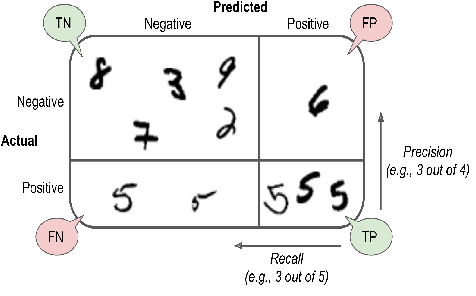
![title](Precision_and_Recall.png)

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 3530 / (3530 + 687)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1325)

0.6511713705958311

It is often convenient to combine precision and recall into a single metric
called the F score, in particular if you need a simple way to compare two
classifiers. The F score is the harmonic mean of precision and recall
Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the
classifier will only get a high F score if both recall and precision are high.

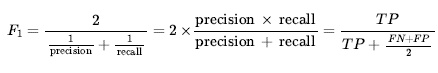![title](f1_score.png)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

# Multiclass Classification

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_clf.predict([some_digit])

array([5], dtype=uint8)

This code trains the SVC on the training set using the
original target classes from 0 to 9 (y_train), instead of the 5-versus-therest
target classes (y_train_5). Then it makes a prediction (a correct one
in this case). Under the hood, Scikit-Learn actually used the OvO strategy:
it trained 45 binary classifiers, got their decision scores for the image, and
selected the class that won the most duels.

If you call the decision_function() method, you will see that it returns
10 scores per instance (instead of just 1). That’s one score per class:

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [ ]:
np.argmax(some_digit_scores)

5

In [ ]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
svm_clf.classes_[5]

5

**Training an SGDClassifier (or a RandomForestClassifier)**

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

This time Scikit-Learn did not have to run OvR or OvO because SGD
classifiers can directly classify instances into multiple classes. The
decision_function() method now returns one value per class

In [ ]:
sgd_clf.decision_function([some_digit]) #class 5 has a score of 2412.5. The model has a slight doubt regarding class 3, which gets a score of 573.5.

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

Use the cross_val_score() function to evaluate
the SGDClassifier’s accuracy:

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

Simply scaling the inputs increases accuracy

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

# **Multilabel Classification**

This code creates a y_multilabel array containing two target labels for
each digit image: the first indicates whether or not the digit is large (7, 8,
or 9), and the second indicates whether or not it is odd

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

The next lines
create a KNeighborsClassifier instance (which supports multilabel
classification, though not all classifiers do), and we train it using the
multiple targets array

In [ ]:
knn_clf.predict([some_digit]) #The digit 5 is indeed not large (False) and odd (True).

array([[False,  True]])

There are many ways to evaluate a multilabel classifier, and selecting the
right metric really depends on your project. One approach is to measure
the F score for each individual label (or any other binary classifier metric
discussed earlier), then simply compute the average score

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel,cv=3)

f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605